In [23]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn import cross_validation
import time 
from sklearn import neighbors
from sklearn.utils import shuffle
tf.logging.set_verbosity(tf.logging.ERROR)

In [24]:
mnist = fetch_mldata("MNIST original")

In [25]:
print(mnist.data.shape)

(70000, 784)


In [26]:
print(np.unique(mnist.target))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [27]:
X, y = np.float32(mnist.data[:70000]), np.float32(mnist.target[:70000])
X, y = shuffle(X,y)

In [28]:
X_train, y_train = np.float32(X[:15000]), np.float32(y[:15000])
X_test, y_test = np.float32(X[60000:]), np.float32(y[60000:])

In [29]:
print(type(X_train))

<class 'numpy.ndarray'>


In [30]:
print (mnist.data.shape)

(70000, 784)


In [31]:
start = int(round(time.time() * 1000))
k = np.arange(5,100,10)
acc = []
for i in k:
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    end = int(round(time.time() * 1000))
    print("KNN fitting finished in ", (end-start), "ms")
    print("--------- Cross validation accuracy--------")
    scores = cross_validation.cross_val_score(clf, X_train,y_train, cv=5)
    print('cross validation with k value', i)
    print ('Cross validation', scores)
    acc.append(scores.mean())
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))





KNN fitting finished in  1238 ms
--------- Cross validation accuracy--------
cross validation with k value 5
Cross validation [ 0.94805195  0.95069953  0.95466667  0.95        0.94958264]
Accuracy: 0.9506 (+/- 0.0044)
KNN fitting finished in  236948 ms
--------- Cross validation accuracy--------
cross validation with k value 15
Cross validation [ 0.94139194  0.94337109  0.94966667  0.94466667  0.94290484]
Accuracy: 0.9444 (+/- 0.0057)
KNN fitting finished in  474403 ms
--------- Cross validation accuracy--------
cross validation with k value 25
Cross validation [ 0.93339993  0.93337775  0.93733333  0.936       0.93522538]
Accuracy: 0.9351 (+/- 0.0031)
KNN fitting finished in  718635 ms
--------- Cross validation accuracy--------
cross validation with k value 35
Cross validation [ 0.92041292  0.93004664  0.93066667  0.93        0.92654424]
Accuracy: 0.9275 (+/- 0.0077)
KNN fitting finished in  981842 ms
--------- Cross validation accuracy--------
cross validation with k value 45
Cross v

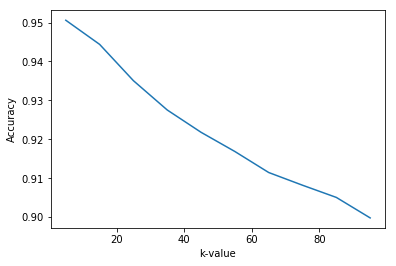

In [32]:
plt.plot(k,acc)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

In [33]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for kNN classifier %s:\n%s\n"
     % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for kNN classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97       962
        1.0       0.93      0.99      0.96      1177
        2.0       0.97      0.94      0.96       994
        3.0       0.95      0.94      0.94      1007
        4.0       0.96      0.95      0.95      1003
        5.0       0.94      0.94      0.94       912
        6.0       0.96      0.99      0.97       977
        7.0       0.96      0.97      0.96      1012
        8.0       0.98      0.87      0.92       993
        9.0       0.93      0.94      0.93       963

avg / total       0.95      0.95      0.95     10000


Confusion matrix:
[[ 949    1    3    0    0    0    9    0    0    0]
 [   0 1168    5    0    4    0    0    0    0    0]
 [  11   18  935    2    2    

In [34]:
print("Accuracy is:",round(metrics.accuracy_score(expected,predicted)*100,2))

Accuracy is: 95.23


In [35]:
print("Test error is:",100-round(metrics.accuracy_score(expected,predicted)*100,2))

Test error is: 4.77


In [36]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[ 949    1    3    0    0    0    9    0    0    0]
 [   0 1168    5    0    4    0    0    0    0    0]
 [  11   18  935    2    2    2    4   17    2    1]
 [   2    5    8  950    1   16    2    9   10    4]
 [   1   15    2    0  949    1    1    1    0   33]
 [   7    6    0   17    0  858   16    2    1    5]
 [   7    1    0    0    2    4  963    0    0    0]
 [   0   13    1    0   10    0    0  980    0    8]
 [   9   21    6   27    9   27    7    1  867   19]
 [   5   10    3    8   10    3    2   16    2  904]]
